In [4]:
import pandas as pd
import numpy as np
from os import path
import dataset

In [5]:
data_set = pd.read_csv(dataset.FULL_TRAIN_FILE)

X = data_set.drop(dataset.TARGET_CLASS, axis=1)
y = data_set[dataset.TARGET_CLASS]

print 'Shape', X.shape, y.shape
print 'Positive Instances', float(len(y[y == 1]))/len(y)
print 'Negative Instances', float(len(y[y == 0]))/len(y)


Shape (114321, 132) (114321,)
Positive Instances 0.761198729892
Negative Instances 0.238801270108


In [31]:
for f in X.columns:
    num_nans = float(len(X[f]) - X[f].count())
    print 'Feature:', f
    print '\tType:', X[f].dtype
    print '\tSparse:', num_nans / len(X[f])
    if X[f].dtype == 'object':
        values = set(pd.unique(X[f].values))
        if len(values) < 50:
            positive = X[f][y == 1]
            negative = X[f][y == 0]
            print '\tValues:', len(values), sorted(values)
            for v in values:
                al = float(X[f][X[f] == v].count()) / X[f].count()
                ps = float(positive[positive == v].count()) / positive.count()
                ng = float(negative[negative == v].count()) / negative.count()
                print '\t\tValue:', v, al, ps, ng
        else:
            print '\tValues:', len(values), 'Too many values to print.'
    else:
        print '\tRange:', round(X[f].min(), 2), round(X[f].max(), 2)
        print '\tMean:', round(X[f].mean(), 4), round(X[f].std(), 4)
        print '\tPositive-Negative Mean Diff:', round(X[f][y==1].mean() - X[f][y==0].mean(), 4)
        print '\tPositive-Negative Std Diff:', round(X[f][y==1].std()-X[f][y==0].std(), 4)

Feature: ID
	Type: int64
	Sparse: 0.0
	Range: 3.0 228713.0
	Mean: 114228.9282 65934.4874
	Positive-Negative Mean Diff: -12.3648
	Positive-Negative Std Diff: -370.2207
Feature: v1
	Type: float64
	Sparse: 0.43589541729
	Range: -0.0 20.0
	Mean: 1.6307 1.0828
	Positive-Negative Mean Diff: -0.0204
	Positive-Negative Std Diff: -0.0158
Feature: v2
	Type: float64
	Sparse: 0.435580514516
	Range: -0.0 20.0
	Mean: 7.4644 2.9617
	Positive-Negative Mean Diff: 0.2516
	Positive-Negative Std Diff: -0.0011
Feature: v3
	Type: object
	Sparse: 0.0302394135811
	Values: 4 [nan, 'A', 'B', 'C']
		Value: nan 0.0 0.0 0.0
		Value: A 0.00204755375956 0.00257594283069 0.000375615069677
		Value: C 0.997474383028 0.996866134068 0.999399015889
		Value: B 0.000478063212585 0.000557923101578 0.000225369041806
Feature: v4
	Type: float64
	Sparse: 0.435580514516
	Range: -0.0 20.0
	Mean: 4.1451 1.1483
	Positive-Negative Mean Diff: 0.1596
	Positive-Negative Std Diff: -0.0115
Feature: v5
	Type: float64
	Sparse: 0.42532867977

In [7]:
variances = X.select_dtypes(exclude=['object']).apply(lambda f: round(f.std(), 5))
variances.sort_values(ascending=False)[:50]

ID      65934.48736
v100        6.88830
v58         6.84124
v119        4.24012
v23         4.00370
v109        3.71200
v82         3.67804
v117        3.61800
v40         3.16918
v87         3.00005
v63         2.96731
v2          2.96168
v25         2.95685
v106        2.95410
v46         2.89583
v89         2.81290
v8          2.78300
v28         2.67794
v114        2.61322
v123        2.60470
v64         2.52559
v51         2.51038
v39         2.35815
v36         2.35563
v101        2.35467
v98         2.32586
v54         2.31448
v70         2.31446
v68         2.28992
v105        2.24731
v81         2.22364
v48         2.19616
v61         2.12098
v44         2.11089
v124        2.09941
v59         2.07167
v45         2.06451
v5          2.03602
v34         2.02518
v118        2.00210
v9          1.93026
v97         1.92407
v17         1.91150
v115        1.90148
v69         1.90050
v65         1.87811
v78         1.84392
v102        1.82404
v122        1.79598
v16         1.79119


In [15]:
# Pairwise correlation
corrs = X.select_dtypes(include=['float64']).corr()
np.fill_diagonal(corrs.values, 0)  # Ignore self-correlation

maxes = corrs.apply(lambda f: pd.Series({'correlation': f.max(), 'neighbour': f.idxmax()}), axis=1)
for c in range(1, 10):
    max_c = float(c) / 10
    print 'Pairs with correlation > ', max_c, ':', len(maxes[maxes['correlation'] > max_c].values)


Pairs with correlation >  0.1 : 108
Pairs with correlation >  0.2 : 106
Pairs with correlation >  0.3 : 106
Pairs with correlation >  0.4 : 103
Pairs with correlation >  0.5 : 99
Pairs with correlation >  0.6 : 95
Pairs with correlation >  0.7 : 85
Pairs with correlation >  0.8 : 71
Pairs with correlation >  0.9 : 47


In [9]:
# From: https://www.kaggle.com/tmjiang/homesite-quote-conversion/stats/notebook

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='white')

def plot_corr(df):
    f, ax = plt.subplots(figsize=(65, 18))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    mask = np.zeros_like(df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(df, mask=mask, cmap=cmap, square=True, linewidths=1, cbar=False, ax=ax)

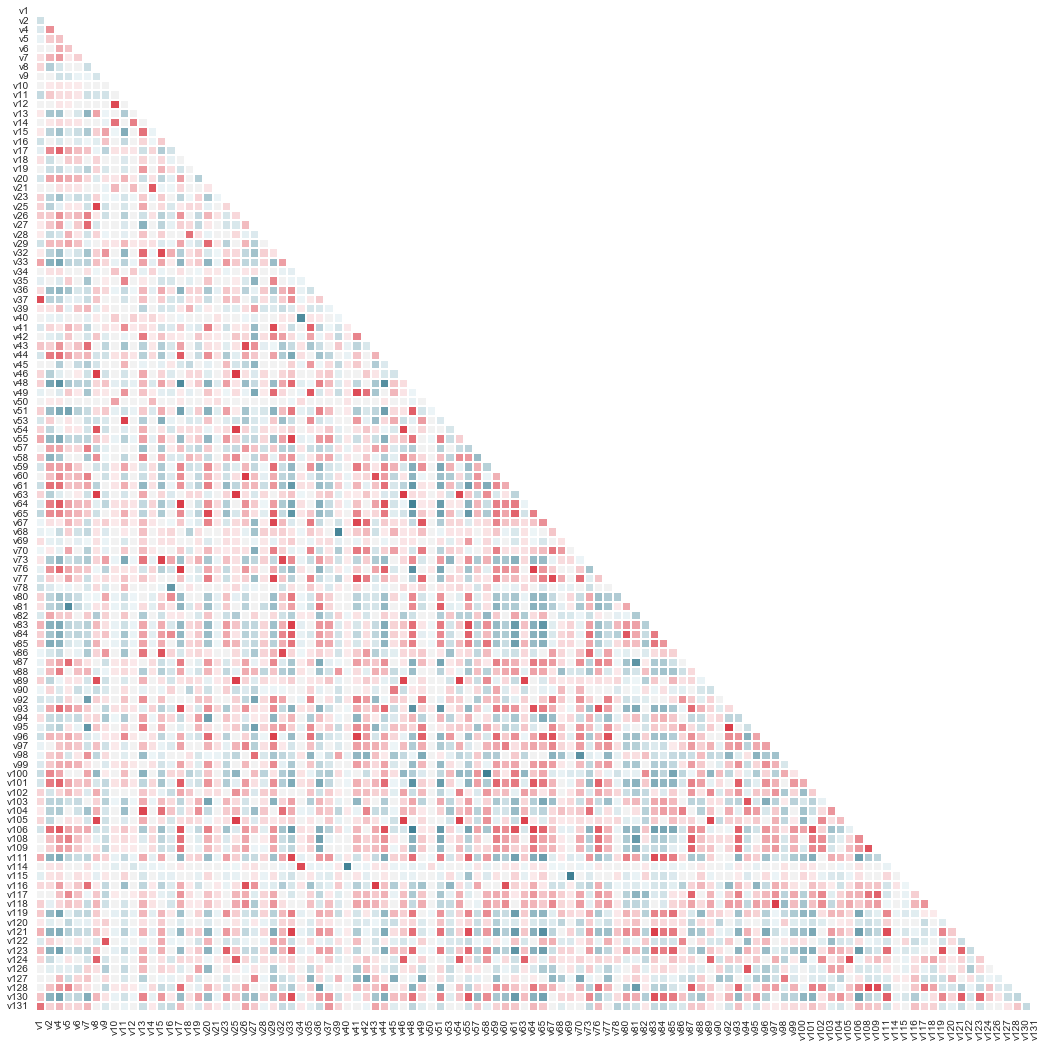

In [13]:
plot_corr(corrs)

In [32]:
X.v22

0          XDX
1          GUV
2           FQ
3         ACUE
4          HIT
5          AYX
6          NFD
7         AHBW
8          GKQ
9          PYF
10         GEH
11        ABQS
12         QKP
13         MVD
14         QKP
15         NKE
16         NSV
17         NaN
18        ABJD
19        AGDF
20         IEE
21        AHGR
22         WRI
23        ACLU
24         VZF
25        ABPH
26         CBS
27         BWJ
28         MQE
29         FLR
          ... 
114291     EFP
114292    AFCI
114293      ZA
114294     YUF
114295     AGT
114296     DNF
114297     MES
114298     VMO
114299     PBC
114300     PQH
114301     QOE
114302    AGWT
114303     DFP
114304    ABZT
114305    AFKY
114306      NC
114307     QOK
114308     VOP
114309     WZY
114310     HRV
114311    AGEE
114312    ABOF
114313     MMU
114314     QOK
114315      IO
114316    ADQC
114317     XRT
114318    AGTG
114319     SGB
114320     QKI
Name: v22, dtype: object